In [36]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [37]:
def read_csv_file(filename):
    data = []

    with open(filename, 'r') as file:
        csv_reader = csv.reader(file)
        next(csv_reader)

        for row in csv_reader:
            data.append(row)

    return data

def linear_regression(a, b, x):
    return a + b * x

def MSE(predictions, targets):
    result = [(expected - predicted) ** 2 for (expected, predicted) in zip(targets, predictions)]
    return np.sum(result) / len(targets) 

In [38]:
train_data = read_csv_file('lab_1_train.csv')
train_data

[['0', '0.0', '20.14901424590337'],
 ['1', '0.010101010101010102', '19.978722729850666'],
 ['2', '0.020202020202020204', '20.234710601834248'],
 ['3', '0.030303030303030304', '20.51751501752847'],
 ['4', '0.04040404040404041', '20.010562068391078'],
 ['5', '0.05050505050505051', '20.030769013925347'],
 ['6', '0.06060606060606061', '20.59497596586434'],
 ['7', '0.07070707070707072', '20.371644560160014'],
 ['8', '0.08080808080808081', '20.020773845835677'],
 ['9', '0.09090909090909091', '20.344586194893974'],
 ['10', '0.10101010101010102', '20.062994894176462'],
 ['11', '0.11111111111111112', '20.082503296151145'],
 ['12', '0.12121212121212122', '20.315012923894052'],
 ['13', '0.13131313131313133', '19.688642189228922'],
 ['14', '0.14141414141414144', '19.765352933074375'],
 ['15', '0.15151515151515152', '20.13434404425801'],
 ['16', '0.16161616161616163', '20.019382987131994'],
 ['17', '0.17171717171717174', '20.437708543212924'],
 ['18', '0.18181818181818182', '20.09122914098'],
 ['19

In [39]:
x_train = [float(row[1]) for row in train_data]  
y_train = [float(row[2]) for row in train_data]  

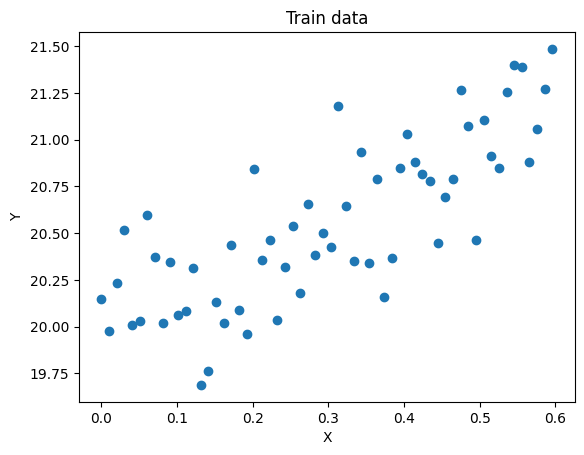

In [40]:
plt.scatter(x_train, y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Train data')
plt.show()

In [43]:
tolerance = 0.000001
learning_rate = 0.005
b0 = 0
b1 = 1
i = 0
prev_loss = 100
curr_loss = 99
while True:
    i += 1
    predictions = [linear_regression(b0, b1, x) for x in x_train]
    errors = [(target - predicted) for (target, predicted) in zip(y_train, predictions)]
    derivative_b0 = -2  * np.sum(errors) / len(x_train)
    derivative_b1 = (-2 / len(x_train)) * np.sum([(x * error) for (x, error) in zip(x_train, errors)])
    b0 = b0 - learning_rate * derivative_b0
    b1 = b1 - learning_rate * derivative_b1
    prev_loss = curr_loss
    curr_loss = MSE(predictions, y_train)
    print(f'Epoch {i}: b0 = {b0}; b1 =  {b1}; loss function value =  {curr_loss}')
    if abs(curr_loss - prev_loss) < tolerance:
        break

Epoch 1: b0 = 0.20251583393058653; b1 =  1.060645141536939; loss function value =  410.22898099843076
Epoch 2: b0 = 0.40282579925163087; b1 =  1.1206144210025422; loss function value =  401.3396528687014
Epoch 3: b0 = 0.6009539685816632; b1 =  1.1799152183687935; loss function value =  392.6432859183061
Epoch 4: b0 = 0.7969241518222028; b1 =  1.238554833064998; loss function value =  384.13569135752635
Epoch 5: b0 = 0.9907598990249291; b1 =  1.296540484856787; loss function value =  375.812771326735
Epoch 6: b0 = 1.1824845032275617; b1 =  1.353879314715531; loss function value =  367.67051692248907
Epoch 7: b0 = 1.372121003258791; b1 =  1.4105783856782643; loss function value =  359.70500626647225
Epoch 8: b0 = 1.5596921865125968; b1 =  1.4666446836982237; loss function value =  351.91240261635727
Epoch 9: b0 = 1.74522059169229; b1 =  1.5220851184861055; loss function value =  344.28895251767557
Epoch 10: b0 = 1.9287285115246062; b1 =  1.576906524342142; loss function value =  336.8309

Epoch 1698: b0 = 19.065122027809654; b1 =  4.897484645159243; loss function value =  0.3344919540410307
Epoch 1699: b0 = 19.065372924590203; b1 =  4.896666267159575; loss function value =  0.3343453540368611
Epoch 1700: b0 = 19.065623751004058; b1 =  4.895848118620787; loss function value =  0.33419883623194624
Epoch 1701: b0 = 19.065874507071136; b1 =  4.895030199478597; loss function value =  0.33405240058019664
Epoch 1702: b0 = 19.066125192811352; b1 =  4.894212509668744; loss function value =  0.33390604703554894
Epoch 1703: b0 = 19.06637580824461; b1 =  4.893395049126981; loss function value =  0.33375977555196484
Epoch 1704: b0 = 19.06662635339081; b1 =  4.892577817789078; loss function value =  0.3336135860834329
Epoch 1705: b0 = 19.066876828269834; b1 =  4.8917608155908265; loss function value =  0.33346747858396686
Epoch 1706: b0 = 19.067127232901566; b1 =  4.890944042468031; loss function value =  0.3333214530076059
Epoch 1707: b0 = 19.067377567305883; b1 =  4.890127498356516

Epoch 3505: b0 = 19.42084457418553; b1 =  3.7371770242522775; loss function value =  0.16793211077193987
Epoch 3506: b0 = 19.420995727807046; b1 =  3.7366839861203514; loss function value =  0.16787890159051921
Epoch 3507: b0 = 19.421146839046376; b1 =  3.73619108623211; loss function value =  0.1678257222437158
Epoch 3508: b0 = 19.421297907915402; b1 =  3.7356983245487916; loss function value =  0.16777257271480214
Epoch 3509: b0 = 19.421448934426007; b1 =  3.7352057010316444; loss function value =  0.16771945298705818
Epoch 3510: b0 = 19.42159991859007; b1 =  3.734713215641928; loss function value =  0.16766636304377516
Epoch 3511: b0 = 19.421750860419458; b1 =  3.7342208683409126; loss function value =  0.16761330286825185
Epoch 3512: b0 = 19.421901759926048; b1 =  3.733728659089879; loss function value =  0.16756027244379837
Epoch 3513: b0 = 19.4220526171217; b1 =  3.733236587850119; loss function value =  0.16750727175373256
Epoch 3514: b0 = 19.422203432018286; b1 =  3.73274465458

Epoch 5399: b0 = 19.642979909493032; b1 =  3.0126082732215624; loss function value =  0.10583809278586535
Epoch 5400: b0 = 19.64306877826202; b1 =  3.0123183979846457; loss function value =  0.1058196999882357
Epoch 5401: b0 = 19.643157622112962; b1 =  3.012028604026272; loss function value =  0.10580131750352734
Epoch 5402: b0 = 19.643246441052845; b1 =  3.0117388913236516; loss function value =  0.10578294532595756
Epoch 5403: b0 = 19.643335235088657; b1 =  3.011449259854001; loss function value =  0.10576458344974665
Epoch 5404: b0 = 19.643424004227377; b1 =  3.0111597095945424; loss function value =  0.10574623186911926
Epoch 5405: b0 = 19.643512748475988; b1 =  3.010870240522506; loss function value =  0.10572789057830219
Epoch 5406: b0 = 19.64360146784147; b1 =  3.0105808526151274; loss function value =  0.10570955957152603
Epoch 5407: b0 = 19.6436901623308; b1 =  3.0102915458496486; loss function value =  0.10569123884302442
Epoch 5408: b0 = 19.64377883195095; b1 =  3.0100023202

Epoch 7076: b0 = 19.76188963134379; b1 =  2.624744412987194; loss function value =  0.08584160664366605
Epoch 7077: b0 = 19.76194515884143; b1 =  2.6245632914670263; loss function value =  0.08583442596209204
Epoch 7078: b0 = 19.762000670769638; b1 =  2.6243822207317873; loss function value =  0.08582724930675718
Epoch 7079: b0 = 19.762056167132773; b1 =  2.6242012007672377; loss function value =  0.08582007667540377
Epoch 7080: b0 = 19.7621116479352; b1 =  2.6240202315591414; loss function value =  0.08581290806577595
Epoch 7081: b0 = 19.762167113181285; b1 =  2.6238393130932667; loss function value =  0.08580574347561852
Epoch 7082: b0 = 19.762222562875387; b1 =  2.623658445355386; loss function value =  0.08579858290267732
Epoch 7083: b0 = 19.76227799702187; b1 =  2.623477628331276; loss function value =  0.08579142634470067
Epoch 7084: b0 = 19.762333415625086; b1 =  2.6232968620067165; loss function value =  0.08578427379943658
Epoch 7085: b0 = 19.762388818689402; b1 =  2.623116146

Epoch 8743: b0 = 19.83584000493409; b1 =  2.3835305162588454; loss function value =  0.07806295399359332
Epoch 8744: b0 = 19.835874797378; b1 =  2.383417029057031; loss function value =  0.07806013483612154
Epoch 8745: b0 = 19.835909580066406; b1 =  2.3833035736760597; loss function value =  0.07805731725936331
Epoch 8746: b0 = 19.83594435300204; b1 =  2.383190150107009; loss function value =  0.07805450126243284
Epoch 8747: b0 = 19.83597911618764; b1 =  2.383076758340959; loss function value =  0.07805168684444362
Epoch 8748: b0 = 19.83601386962594; b1 =  2.3829633983689926; loss function value =  0.0780488740045109
Epoch 8749: b0 = 19.836048613319672; b1 =  2.382850070182195; loss function value =  0.07804606274174973
Epoch 8750: b0 = 19.83608334727157; b1 =  2.3827367737716543; loss function value =  0.07804325305527544
Epoch 8751: b0 = 19.83611807148436; b1 =  2.38262350912846; loss function value =  0.07804044494420492
Epoch 8752: b0 = 19.83615278596078; b1 =  2.382510276243705; l

Epoch 10467: b0 = 19.883408771894253; b1 =  2.2283690602181787; loss function value =  0.07494692345670943
Epoch 10468: b0 = 19.88343022646181; b1 =  2.228299078964638; loss function value =  0.07494585147100379
Epoch 10469: b0 = 19.883451675013692; b1 =  2.228229117333244; loss function value =  0.0749447800863652
Epoch 10470: b0 = 19.88347311755158; b1 =  2.2281591753184937; loss function value =  0.07494370930245646
Epoch 10471: b0 = 19.883494554077167; b1 =  2.228089252914888; loss function value =  0.074942639118941
Epoch 10472: b0 = 19.883515984592133; b1 =  2.2280193501169276; loss function value =  0.07494156953548213
Epoch 10473: b0 = 19.883537409098167; b1 =  2.227949466919115; loss function value =  0.07494050055174316
Epoch 10474: b0 = 19.883558827596953; b1 =  2.227879603315955; loss function value =  0.07493943216738799
Epoch 10475: b0 = 19.883580240090176; b1 =  2.2278097593019535; loss function value =  0.07493836438208061
Epoch 10476: b0 = 19.883601646579518; b1 =  2.2

In [44]:
test_data = read_csv_file('lab_1_test.csv')
test_data

[['0', '0.6060606060606061', '21.068368940767623'],
 ['1', '0.6161616161616162', '21.176625539324085'],
 ['2', '0.6262626262626263', '20.920624760323445'],
 ['3', '0.6363636363636365', '20.91386528550307'],
 ['4', '0.6464646464646465', '21.536687039647553'],
 ['5', '0.6565656565656566', '21.720003321702563'],
 ['6', '0.6666666666666667', '21.31173029685923'],
 ['7', '0.6767676767676768', '21.65459522290296'],
 ['8', '0.686868686868687', '21.482228181251664'],
 ['9', '0.696969696969697', '21.20040346755786'],
 ['10', '0.7070707070707072', '21.52256009579394'],
 ['11', '0.7171717171717172', '21.895754404283228'],
 ['12', '0.7272727272727273', '21.443797642812466'],
 ['13', '0.7373737373737375', '21.944140571491676'],
 ['14', '0.7474747474747475', '20.70902596372257'],
 ['15', '0.7575757575757577', '21.761722266464083'],
 ['16', '0.7676767676767677', '21.561467655824988'],
 ['17', '0.7777777777777778', '21.4658533504158'],
 ['18', '0.787878787878788', '21.603285808718226'],
 ['19', '0.797

In [45]:
x_test = [float(row[1]) for row in test_data]  
y_test = [float(row[2]) for row in test_data] 

In [47]:
predictions = [linear_regression(b0, b1, x) for x in x_test]
print('Loss function on test data')
MSE(predictions, y_test)

Loss function on test data


0.079726616740692

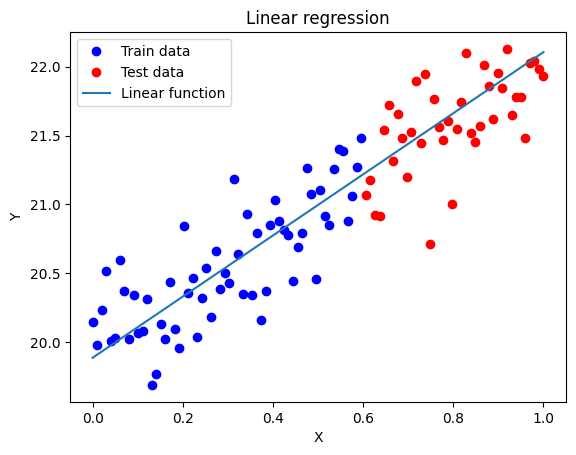

In [50]:
plt.plot(x_train, y_train, 'bo', label = 'Train data')
plt.plot(x_test, y_test, 'ro', label = 'Test data')
plt.plot([0, 1], [linear_regression(b0, b1, 0), linear_regression(b0, b1, 1)], label = 'Linear function')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear regression')
plt.legend()
plt.show()